<div style="background: linear-gradient(90deg, #f8fafc 0%, #e0e7ef 100%); padding: 20px; border-radius: 10px;">

# 🎨 <span style="color:#1976d2"><b>NLP'de Bag of Words (BoW) Yöntemi</b></span> <span style="font-size:1.5em;"></span>

Bu notebook, BoW yaklaşımını hem temel hem de IMDB veri seti üzerinde profesyonel şekilde tanıtır. Adım adım ilerleyerek metin vektörleştirme, veri analizi, pastel tonlarda görselleştirme ve basit sınıflandırıcı eğitimi konularını ele alacağız.

<div style="background:#fffde7; border-radius:8px; padding:10px; margin-bottom:10px; border-left:6px solid #fbc02d;">
<b>⚡ Flashcard:</b> <span style="color:#fbc02d"><b>BoW</b></span> metinleri kelime sıklıklarına göre vektörleştirir. <b>Önemli:</b> Kelime sırası dikkate alınmaz!
</div>

## <span style="color:#388e3c"><b>İçerik</b></span> <span style="font-size:1.2em;">📋</span>
- <b>Gerekli Kütüphanelerin Yüklenmesi ve İçe Aktarılması</b> <span style="color:#0288d1">🔧</span>
- <b>BoW (Bag of Words) Yönteminin Temelleri</b> <span style="color:#e65100">📚</span>
- <b>BoW ile Basit Metin Vektörleştirme</b> <span style="color:#ad1457">📝</span>
- <b>IMDB Veri Setinin Yüklenmesi ve İncelenmesi</b> <span style="color:#388e3c">📦</span>
- <b>BoW ile IMDB Veri Setinin Vektörleştirilmesi</b> <span style="color:#5e35b1">🔢</span>
- <b>BoW Özellikleriyle Basit Sınıflandırıcı Eğitimi</b> <span style="color:#fbc02d">🤖</span>
- <b>Model Performansının Değerlendirilmesi</b> <span style="color:#8e24aa">📊</span>
- <b>Pastel Tonlarda Veri Görselleştirme</b> <span style="color:#0288d1">🎨</span>
- <b>Yol Gösterici 5 Örnek</b> <span style="color:#689f38">🚀</span>

</div>

## 1. Gerekli Kütüphanelerin Yüklenmesi ve İçe Aktarılması

<div style="background:#e0f7fa; border-radius:8px; padding:10px; margin-bottom:10px;">
<b>🔑 Flashcard:</b> <span style="color:#00796b"><b>CountVectorizer</b></span> metinleri sayısal vektörlere dönüştürmek için kullanılır.
</div>

NLP uygulamalarında sıkça kullanılan kütüphaneleri yükleyelim ve içe aktaralım. Bu adımda <b>NumPy</b>, <b>pandas</b>, <b>scikit-learn</b> ve <b>nltk</b> gibi temel araçlar kullanılacaktır.

In [1]:
# Gerekli kütüphanelerin yüklenmesi ve içe aktarılması
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import nltk
import re
from collections import Counter

# nltk veri setleri (isteğe bağlı)
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Cemal\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

## 2. BoW (Bag of Words) Yönteminin Temelleri

<div style="background:#fff3e0; border-radius:8px; padding:10px; margin-bottom:10px;">
<b>📚 Flashcard:</b> <span style="color:#e65100"><b>BoW</b></span> yöntemi, metinleri kelime sıklıklarına göre vektörleştirir. <b>Önemli:</b> Kelime sırası dikkate alınmaz!
</div>

Bag of Words (BoW), metinleri sayısal vektörlere dönüştürmek için kullanılan en temel yöntemlerden biridir. Her metin, içindeki kelimelerin sıklığına göre bir vektörle temsil edilir. Bu yöntem, metin madenciliği ve makine öğrenmesi uygulamalarında sıkça kullanılır.

In [2]:
# BoW mantığı: Küçük bir örnek
metinler = [
    "kedi bahçede",
    "kedi evde"
]

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(metinler)

print("Kelime kümesi:", vectorizer.get_feature_names_out())
print("Vektör temsili:", X.toarray())

Kelime kümesi: ['bahçede' 'evde' 'kedi']
Vektör temsili: [[1 0 1]
 [0 1 1]]


## 3. BoW ile Basit Metin Vektörleştirme

<div style="background:#fce4ec; border-radius:8px; padding:10px; margin-bottom:10px;">
<b>📝 Flashcard:</b> <span style="color:#ad1457"><b>Vektör temsili</b></span> ile her metin, kelime kümesindeki kelimelerin varlığına göre bir sayı dizisiyle gösterilir.
</div>

Aşağıda, <b>CountVectorizer</b> ile iki kısa metnin BoW vektörleştirmesi gösterilmektedir. Her metin, kelime kümesindeki kelimelerin varlığına göre bir vektörle temsil edilir.

## 4. IMDB Veri Setinin Yüklenmesi ve İncelenmesi

<div style="background:#e8f5e9; border-radius:8px; padding:10px; margin-bottom:10px;">
<b>📦 Flashcard:</b> <span style="color:#388e3c"><b>IMDB Dataset</b></span> film yorumları ve duygu etiketleri içerir. <b>Önemli:</b> Gerçek dünya uygulamaları için idealdir!
</div>

Gerçek dünya uygulaması için IMDB film yorumları veri setini kullanacağız. Veri setini yükleyip temel istatistiklerini ve örneklerini inceleyelim.

In [3]:
# IMDB veri setini yükle
imdb_df = pd.read_csv("IMDB Dataset.csv")
print("Veri seti boyutu:", imdb_df.shape)
print(imdb_df.head())

Veri seti boyutu: (50000, 2)
                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive


In [4]:
# Metin temizleme fonksiyonu
def clean_text(text):
    text = text.lower()
    text = re.sub(r"\d+", "", text)
    text = re.sub(r"[^\w\s]", "", text)
    text = " ".join([word for word in text.split() if len(word) > 2])
    return text

# Metinleri temizle
imdb_df["clean_review"] = imdb_df["review"].apply(clean_text)
print(imdb_df[["review", "clean_review"]].head())

                                              review  \
0  One of the other reviewers has mentioned that ...   
1  A wonderful little production. <br /><br />The...   
2  I thought this was a wonderful way to spend ti...   
3  Basically there's a family where a little boy ...   
4  Petter Mattei's "Love in the Time of Money" is...   

                                        clean_review  
0  one the other reviewers has mentioned that aft...  
1  wonderful little production the filming techni...  
2  thought this was wonderful way spend time too ...  
3  basically theres family where little boy jake ...  
4  petter matteis love the time money visually st...  


## 5. BoW ile IMDB Veri Setinin Vektörleştirilmesi

<div style="background:#ede7f6; border-radius:8px; padding:10px; margin-bottom:10px;">
<b>🔢 Flashcard:</b> <span style="color:#5e35b1"><b>BoW vektörleştirme</b></span> ile binlerce metin, makine öğrenmesi için hazır hale gelir.
</div>

Temizlenmiş metinleri BoW yöntemiyle vektörleştirip, kelime kümesini ve örnek vektör temsillerini inceleyelim.

In [5]:
# BoW vektörleştirme
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(imdb_df["clean_review"][:1000])  # örnek olarak ilk 1000 yorum
feature_names = vectorizer.get_feature_names_out()
print("Kelime kümesi örneği:", feature_names[:10])
print("Vektör temsili örneği:", X.toarray()[:5])

Kelime kümesi örneği: ['_fargo_' '_inspire_' 'aaargh' 'aaliyah' 'aamir' 'aaron' 'abandon'
 'abandoned' 'abandons' 'abba']
Vektör temsili örneği: [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [6]:
# Kelime frekans analizi
word_counts = X.sum(axis=0).A1
word_freq = dict(zip(feature_names, word_counts))
most_common_10 = Counter(word_freq).most_common(10)
print("En sık geçen 10 kelime:", most_common_10)

En sık geçen 10 kelime: [('the', np.int64(13363)), ('and', np.int64(6402)), ('this', np.int64(3074)), ('that', np.int64(2611)), ('was', np.int64(1916)), ('with', np.int64(1764)), ('for', np.int64(1706)), ('movie', np.int64(1703)), ('but', np.int64(1603)), ('film', np.int64(1473))]


## 6. BoW Özellikleriyle Basit Sınıflandırıcı Eğitimi

<div style="background:#fffde7; border-radius:8px; padding:10px; margin-bottom:10px;">
<b>🤖 Flashcard:</b> <span style="color:#fbc02d"><b>Lojistik Regresyon</b></span> BoW vektörleriyle duygu analizi için en temel sınıflandırıcıdır.
</div>

BoW ile elde edilen vektörleri kullanarak basit bir lojistik regresyon modeli ile duygu analizi (sentiment classification) gerçekleştireceğiz.

In [7]:
# Sınıflandırıcı eğitimi
labels = imdb_df["sentiment"][:1000].map({"positive": 1, "negative": 0})
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=42)
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)
pred = model.predict(X_test)

## 7. Model Performansının Değerlendirilmesi

<div style="background:#f3e5f5; border-radius:8px; padding:10px; margin-bottom:10px;">
<b>📊 Flashcard:</b> <span style="color:#8e24aa"><b>Doğruluk</b></span> ve <span style="color:#d81b60"><b>Karışıklık Matrisi</b></span> ile model başarısını ölç!
</div>

Eğitilen modelin doğruluk, karışıklık matrisi ve sınıflandırma raporu ile performansını değerlendirelim.

In [8]:
# Model performansı
print("Doğruluk:", accuracy_score(y_test, pred))
print("Karışıklık Matrisi:\n", confusion_matrix(y_test, pred))
print("Sınıflandırma Raporu:\n", classification_report(y_test, pred))

Doğruluk: 0.795
Karışıklık Matrisi:
 [[81 23]
 [18 78]]
Sınıflandırma Raporu:
               precision    recall  f1-score   support

           0       0.82      0.78      0.80       104
           1       0.77      0.81      0.79        96

    accuracy                           0.80       200
   macro avg       0.80      0.80      0.79       200
weighted avg       0.80      0.80      0.80       200



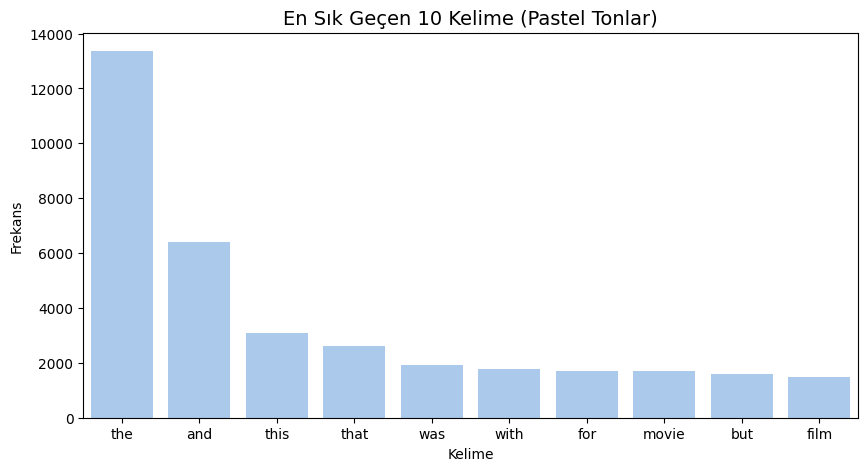

In [10]:
# En sık geçen 10 kelimeyi pastel tonlarda görselleştir
kelimeler, frekanslar = zip(*most_common_10)
plt.figure(figsize=(10,5))
sns.barplot(x=list(kelimeler), y=list(frekanslar))
plt.title('En Sık Geçen 10 Kelime (Pastel Tonlar)', fontsize=14)
plt.xlabel('Kelime')
plt.ylabel('Frekans')
plt.show()

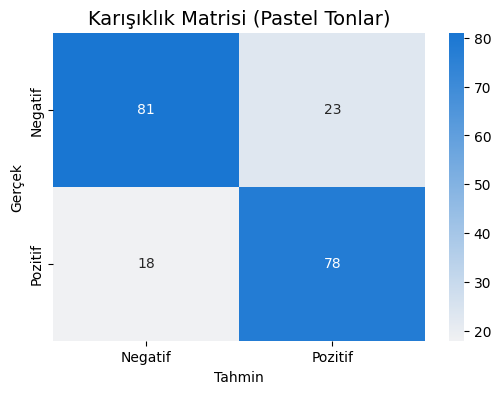

In [16]:
# Modelin karışıklık matrisini pastel tonlarda görselleştir
cm = confusion_matrix(y_test, pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap=sns.light_palette("#1976d2", as_cmap=True),
            xticklabels=['Negatif', 'Pozitif'], yticklabels=['Negatif', 'Pozitif'])
plt.title('Karışıklık Matrisi (Pastel Tonlar)', fontsize=14)
plt.xlabel('Tahmin')
plt.ylabel('Gerçek')
plt.show()